## 1. Web scraping - first page

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import itertools

r_movie = requests.get("https://www.filmweb.pl/film/Skazani+na+Shawshank-1994-1048")
soup_movie = bs(r_movie.content)

# print(soup_movie.prettify())

In [2]:
movie_data = {}
dictionary_keys_temp = []

polish_title = soup_movie.find("h1", {"class": "filmCoverSection__title"})
original_title = soup_movie.find("div", {"class": "filmCoverSection__originalTitle"})
release_year = soup_movie.find("div", {"class": "filmCoverSection__year"})
duration = soup_movie.find("div", {"class": "filmCoverSection__duration"})

movie_data['polish_title'] = polish_title.get_text(" ", strip=True)
movie_data['original_title'] = original_title.get_text(" ", strip=True)
movie_data['release_year'] = release_year.get_text(" ", strip=True)
movie_data['duration'] = duration.get_text(" ", strip=True)

headers = soup_movie.find_all(["div", "h3"], {"class": "filmInfo__header"})

for row in headers:
    key = row.get_text(" ")
    dictionary_keys_temp.append(key)
    
info = soup_movie.find_all("div", {"class": "filmInfo__info"})

for (key, row) in zip(dictionary_keys_temp, info):
    value = row.get_text(" ", strip=True)
    movie_data[key] = value
    
dictionary_keys_temp.clear()

movie_data

{'polish_title': 'Skazani na Shawshank',
 'original_title': 'The Shawshank Redemption',
 'release_year': '1994',
 'duration': '2 godz. 22 min.',
 'reżyseria': 'Frank Darabont',
 'scenariusz': 'Frank Darabont',
 'gatunek': 'Dramat',
 'produkcja': 'USA',
 'świat': 'Stephen King',
 'premiera': '10 września 1994 (Światowa premiera) 16 kwietnia 1995 (Polska premiera kinowa)',
 'boxoffice': '$28 884 504 na świecie $28 767 189 w USA $117 315 poza USA',
 'budżet': '$25 000 000',
 'na podstawie': 'Stephen King (opowiadanie)',
 'studio': 'Castle Rock Entertainment (przedstawia)',
 'tytuł oryg.': 'The Shawshank Redemption',
 'inne tytuły': 'Sueño de fuga Miedzynarodowe Rita Hayworth and the Shawshank Redemption (tytuł roboczy) USA Więcej...'}

## 2. Web scraping - TOP 500 movies

In [35]:
from bs4 import BeautifulSoup as bs
import requests
import itertools

movies_data_list = []

def get_movie_data(href):
    
    r_movie = requests.get(href)
    soup_movie = bs(r_movie.content)
    
    movie_data = {}
    dictionary_keys_temp = []

    polish_title = soup_movie.find("h1", {"class": "filmCoverSection__title"})
    release_year = soup_movie.find("div", {"class": "filmCoverSection__year"})
    duration = soup_movie.find("div", {"class": "filmCoverSection__duration"})
    
    movie_data['polish_title'] = polish_title.get_text(" ", strip=True)
    movie_data['release_year'] = release_year.get_text(" ", strip=True)
    movie_data['duration'] = duration.get_text(" ", strip=True)

    headers = soup_movie.find_all(["div", "h3"], {"class": "filmInfo__header"})

    for row in headers:
        key = row.get_text(" ")
        dictionary_keys_temp.append(key)

    info = soup_movie.find_all("div", {"class": "filmInfo__info"})

    for (key, row) in zip(dictionary_keys_temp, info):
        value = row.get_text(" ", strip=True)
        movie_data[key] = value

    dictionary_keys_temp.clear()
    
    movies_data_list.append(movie_data)

In [33]:
# test
get_movie_data('https://www.filmweb.pl/film/Forrest+Gump-1994-998')
movies_data_list

[{'polish_title': 'Forrest Gump',
  'release_year': '1994',
  'duration': '2 godz. 22 min.',
  'reżyseria': 'Robert Zemeckis',
  'scenariusz': 'Eric Roth',
  'gatunek': 'Dramat , Komedia',
  'produkcja': 'USA',
  'premiera': '23 czerwca 1994 (Światowa premiera) 4 listopada 1994 (Polska premiera kinowa)',
  'boxoffice': '$678 226 465 na świecie $330 455 270 w USA $347 771 195 poza USA',
  'budżet': '$55 000 000',
  'na podstawie': 'Winston Groom (powieść)',
  'studio': 'Paramount Pictures (przedstawia)',
  'tytuł oryg.': 'Forrest Gump',
  'inne tytuły': 'Forrest Gump: The IMAX Experience (wersja IMAX) USA Więcej...'}]

In [36]:
movies_data_list = []

In [37]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

# selenium is used because bs4 con not handle scroll

browser = webdriver.Firefox()

browser.get("https://www.filmweb.pl/ranking/film")
time.sleep(2)
browser.find_element("id", "didomi-notice-agree-button").click()
time.sleep(3)
browser.find_element(By.CLASS_NAME, "ws__skipButton").click()

for scrolls in range(65): 
    browser.execute_script("window.scrollBy(0, 1200)")
    time.sleep(0.4)

movies = browser.find_elements(By.CLASS_NAME, "rankingType__title")

for index, movie in enumerate(movies):
    try:
        href = movie.find_element(By.CSS_SELECTOR, "a").get_attribute("href")
        # print(f"{movie.text} - {href}")
        get_movie_data(href)
    except Exception as e:
        print(f'{movie.text} || {e}')
        
    if index % 20 == 0: print(index)
    if index == len(movies)-1: print('end')


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
end


In [44]:
print(len(movies_data_list))
movies_data_list[499]

500


{'polish_title': 'Akira',
 'release_year': '1988',
 'duration': '2 godz. 4 min.',
 'reżyseria': 'Katsuhiro Ôtomo',
 'scenariusz': 'Katsuhiro Ôtomo , Izô Hashimoto',
 'gatunek': 'Sci-Fi , Anime',
 'produkcja': 'Japonia',
 'premiera': '16 lipca 1988 (Światowa premiera) czerwiec 1996 (Polska premiera kinowa)',
 'boxoffice': '$1 863 460 na świecie $553 171 w USA $1 310 289 poza USA',
 'na podstawie': 'Katsuhiro Ôtomo (manga)',
 'studio': 'TMS Entertainment (przedstawia) / Akira Committee Company Ltd. / Bandai / Więcej...',
 'tytuł oryg.': 'Akira',
 'inne tytuły': 'Akira: The Special Edition (tytuł wznowienia) USA Akira Wielka Brytania Akira Australia Akira Kanada Akira Irlandia Więcej...'}

## 3. Data cleaning

In [2]:
import json

def save_data(file_name, data):
    with open(file_name, "w", encoding="utf-8") as file:
        json.dump(data, file, ensure_ascii=False, indent=4)
    
def load_data(file_name):
    with open(file_name, encoding="utf-8") as file:
        return json.load(file)

In [46]:
save_data("movies_data.json", movies_data_list)

In [92]:
movies_data_list = load_data("movies_data.json")

In [93]:
movies_data_list[44]

{'polish_title': 'Dawno temu w Ameryce',
 'release_year': '1984',
 'duration': '3 godz. 49 min.',
 'reżyseria': 'Sergio Leone',
 'scenariusz': 'Leonardo Benvenuti , Franco Arcalli',
 'gatunek': 'Dramat , Gangsterski',
 'produkcja': 'USA , Włochy',
 'premiera': '17 lutego 1984 (Światowa premiera) 31 grudnia 1984 (Polska premiera kinowa)',
 'boxoffice': '$5 473 337 na świecie $5 321 508 w USA $151 829 poza USA',
 'budżet': '$30 000 000',
 'na podstawie': 'Harry Grey (powieść)',
 'studio': 'Embassy International Pictures / Ladd Company, The / PSO International / Więcej...',
 'tytuł oryg.': 'Once Upon a Time in America',
 'inne tytuły': 'Więcej...'}

In [94]:
all_keys = {}
for movie in movies_data_list:
    for key, value in movie.items():
        if key not in all_keys:
            all_keys[key] = movie['polish_title']
        
all_keys

{'polish_title': 'Skazani na Shawshank',
 'release_year': 'Skazani na Shawshank',
 'duration': 'Skazani na Shawshank',
 'reżyseria': 'Skazani na Shawshank',
 'scenariusz': 'Skazani na Shawshank',
 'gatunek': 'Skazani na Shawshank',
 'produkcja': 'Skazani na Shawshank',
 'świat': 'Skazani na Shawshank',
 'premiera': 'Skazani na Shawshank',
 'boxoffice': 'Skazani na Shawshank',
 'budżet': 'Skazani na Shawshank',
 'na podstawie': 'Skazani na Shawshank',
 'studio': 'Skazani na Shawshank',
 'tytuł oryg.': 'Skazani na Shawshank',
 'inne tytuły': 'Skazani na Shawshank',
 'dystrybucja': 'Nietykalni',
 'nagrody': 'Podziemny krąg'}

In [95]:
import re

def duration_to_int(duration):
    try:
        try:
            result = re.search('(.*) godz\. (.*) min', duration)
            time = int(result.group(1)) * 60 + int(result.group(2)) 
        except AttributeError:
            try:
                result = re.search('(.*) godz', duration)
                time = int(result.group(1)) * 60
            except AttributeError:
                result = re.search('(.*) min', duration)
                time = int(result.group(1))
    except Exception:
        print(f'{duration} || {Exception}')
    return time

all_genres_pl = []
all_genres_dic = {}
all_countries_pl = []
all_countries_dic = {}
    
for movie in movies_data_list:
    
    # polish_title
    movie['polish title'] = movie.pop('polish_title', None)
    
    # release_year
    movie['release year'] = movie.pop('release_year', None)
    if movie.get('release year') is not None:
        movie['release year'] = int(movie.get('release year'))
    
    # duration
    if "duration" in movie:
        movie['duration (mi)'] = duration_to_int(movie.get('duration'))
        movie.pop('duration', None)
    else:
        movie['duration (mi)'] = None
        
    # director
    if "reżyseria" in movie:
        movie["reżyseria"] = re.split(r' ?, ?|\s+,\s+', movie.get('reżyseria')) 
    movie['director'] = movie.pop('reżyseria', None)
    
    # screenplay
    if "scenariusz" in movie:
        movie["scenariusz"] = re.split(r' ?, ?|\s+,\s+', movie.get('scenariusz')) 
    movie['screenplay'] = movie.pop('scenariusz', None)
    
    # genre
    if "gatunek" in movie:
        movie["gatunek"] = re.split(r' ?, ?|\s+,\s+', movie.get('gatunek'))
        for genre in movie.get('gatunek'):
            if genre not in all_genres_pl:
                all_genres_pl.append(genre)
    movie['genre'] = movie.pop('gatunek', None)
    
    # country
    if "produkcja" in movie:
        movie["produkcja"] = re.split(r' ?, ?|\s+,\s+', movie.get('produkcja'))
        for country in movie.get('produkcja'):
            if country not in all_countries_pl:
                all_countries_pl.append(country)
    movie['country'] = movie.pop('produkcja', None)
    
    # universe
    if "świat" in movie:
        movie["świat"] = re.split(r' ?/ ?|\s+/\s+', movie.get('świat')) 
    movie['universe'] = movie.pop('świat', None)
    
    # premiere
    movie.pop('premiera', None)
    
    # boxoffice
    if "boxoffice" in movie:
        no_spaces_string = re.sub(r'\s+', '', movie.get('boxoffice'))
        number = re.search(r'(\d+)', no_spaces_string)
        movie['boxoffice'] = int(number.group(1))
    movie['boxoffice (USD)'] = movie.pop('boxoffice', None)
    
    # budget
    if "budżet" in movie:
        no_spaces_string = re.sub(r'\s+', '', movie.get('budżet'))
        number = re.search(r'(\d+)', no_spaces_string)
        movie['budżet'] = int(number.group(1))
    movie['budget (USD)'] = movie.pop('budżet', None)
    
    # based on
    movie.pop('na podstawie', None)
    
    # studio
    if "studio" in movie:
        string = re.sub(r'\s+\([^)]+\)', '', movie.get('studio'))
        string = re.sub(r'\s+/\s+więcej[.]+', '', string, flags=re.IGNORECASE)
        movie['studio'] = re.split(r'\s+/\s+', string)
    else:
        movie['studio'] = None
    
    # original title
    movie['original title'] = movie.pop('tytuł oryg.', None)
    
    # other titles
    movie.pop('inne tytuły', None)
    
    # distribution
    movie['distribution'] = movie.pop('dystrybucja', None)
    
    # awards
    movie.pop('nagrody', None)

In [96]:
import translators.server as tss

# genre and country translation
for genre in all_genres_pl:
    all_genres_dic[genre] = tss.google(genre, 'pl', 'en')
    
for country in all_countries_pl:
    all_countries_dic[country] = tss.google(country, 'pl', 'en')

In [97]:
all_genres_dic

{'Dramat': 'Drama',
 'Biograficzny': 'Biographical',
 'Komedia': 'Comedy',
 'Gangsterski': 'Gangster',
 'Dramat sądowy': 'Judicial drama',
 'Psychologiczny': 'Psychological',
 'Fantasy': 'Fantasy',
 'Przygodowy': 'Adventure',
 'Wojenny': 'War',
 'Kryminał': 'Jail',
 'Thriller': 'Thriller',
 'Surrealistyczny': 'Surreal',
 'Sci-Fi': 'Sci-fi',
 'Western': 'Western',
 'Animacja': 'Animation',
 'Familijny': 'Family',
 'Dramat historyczny': 'Historical drama',
 'Muzyczny': 'Musical',
 'Dramat obyczajowy': 'Drama',
 'Akcja': 'Share',
 'Sensacyjny': 'Sensational',
 'Melodramat': 'Melodrama',
 'Anime': 'Anime',
 'Komedia kryminalna': 'Criminal comedy',
 'Kostiumowy': 'Costume',
 'Obyczajowy': 'Moral',
 'Sportowy': 'Sporty',
 'Świąteczny': 'Festive',
 'Horror': 'Horror',
 'Komedia obycz.': 'Custom comedy.',
 'Musical': 'Musical',
 'Dokumentalny': 'Documentary',
 'Animacja dla dorosłych': 'Animation for adults',
 'Krótkometrażowy': 'Short',
 'Polityczny': 'Political',
 'Przyrodniczy': 'Natural',


In [98]:
all_countries_dic

{'USA': 'USA',
 'Francja': 'France',
 'Nowa Zelandia': 'New Zealand',
 'Włochy': 'Italy',
 'Niemcy': 'Germany',
 'Kanada': 'Canada',
 'Polska': 'Poland',
 'Wielka Brytania': 'Great Britain',
 'Malta': 'Malta',
 'Maroko': 'Morocco',
 'Australia': 'Australia',
 'Hiszpania': 'Spain',
 'RFN': 'West Germany',
 'Zjednoczone Emiraty Arabskie': 'United Arab Emirates',
 'Indie': 'India',
 'Korea Południowa': 'South Korea',
 'Hongkong': 'Hong Kong',
 'Japonia': 'Japan',
 'Brazylia': 'Brazil',
 'Szwajcaria': 'Switzerland',
 'Irlandia': 'Ireland',
 'Meksyk': 'Mexico',
 'Estonia': 'Estonia',
 'Gruzja': 'Georgia',
 'Czechy': 'The czech republic',
 'Dania': 'Denmark',
 'Szwecja': 'Sweden',
 'Indonezja': 'Indonesia',
 'Singapur': 'Singapore',
 'Tajlandia': 'Thailand',
 'Kenia': 'Kenya',
 'Jordania': 'Jordan',
 'Arabia Saudyjska': 'Saudi Arabia',
 'RPA': 'South Africa',
 'Ghana': 'Ghana',
 'Egipt': 'Egypt',
 'Chiny': 'China',
 'Liban': 'Lebanon',
 'Belgia': 'Belgium',
 'Luksemburg': 'Luxembourg',
 'Nor

In [99]:
all_genres_dic['Biograficzny'] = 'Biography'
all_genres_dic['Gangsterski'] = 'Crime'
all_genres_dic['Dramat sądowy'] = 'Drama'
all_genres_dic['Kryminał'] = 'Crime'
all_genres_dic['Dramat historyczny'] = 'Drama'
all_genres_dic['Akcja'] = 'Action'
all_genres_dic['Melodramat'] = 'Drama'
all_genres_dic['Komedia kryminalna'] = ['Crime', 'Comedy']
all_genres_dic['Obyczajowy'] = 'Drama'
all_genres_dic['Komedia obycz.'] = 'Comedy'
all_genres_dic['Animacja dla dorosłych'] = 'Animation'
all_genres_dic['Przyrodniczy'] = 'Nature'
all_genres_dic['Film-Noir'] = 'Film-Noir'
all_genres_dic['Komedia rom.'] = ['Comedy','Romance']
all_genres_dic['Czarna komedia'] = 'Comedy'
all_genres_dic['Niemy'] = 'Silent'
all_genres_dic['Dla młodzieży'] = 'Teen'
all_genres_dic['Biblijny'] = 'Bible'

all_countries_dic['Fed. Rep. Jugosławii'] = 'Yugoslavia'
all_countries_dic['RFN'] = 'Germany'

all_genres_dic

{'Dramat': 'Drama',
 'Biograficzny': 'Biography',
 'Komedia': 'Comedy',
 'Gangsterski': 'Crime',
 'Dramat sądowy': 'Drama',
 'Psychologiczny': 'Psychological',
 'Fantasy': 'Fantasy',
 'Przygodowy': 'Adventure',
 'Wojenny': 'War',
 'Kryminał': 'Crime',
 'Thriller': 'Thriller',
 'Surrealistyczny': 'Surreal',
 'Sci-Fi': 'Sci-fi',
 'Western': 'Western',
 'Animacja': 'Animation',
 'Familijny': 'Family',
 'Dramat historyczny': 'Drama',
 'Muzyczny': 'Musical',
 'Dramat obyczajowy': 'Drama',
 'Akcja': 'Action',
 'Sensacyjny': 'Sensational',
 'Melodramat': 'Drama',
 'Anime': 'Anime',
 'Komedia kryminalna': ['Crime', 'Comedy'],
 'Kostiumowy': 'Costume',
 'Obyczajowy': 'Drama',
 'Sportowy': 'Sporty',
 'Świąteczny': 'Festive',
 'Horror': 'Horror',
 'Komedia obycz.': 'Comedy',
 'Musical': 'Musical',
 'Dokumentalny': 'Documentary',
 'Animacja dla dorosłych': 'Animation',
 'Krótkometrażowy': 'Short',
 'Polityczny': 'Political',
 'Przyrodniczy': 'Nature',
 'Sztuki walki': 'Martial arts',
 'Dreszczowie

In [39]:
save_data("genres_dictionary.json", all_genres_dic)
save_data("countries_dictionary.json", all_countries_dic)

In [100]:
all_genres_dic = load_data("genres_dictionary.json")
all_countries_dic = load_data("countries_dictionary.json")

In [101]:
movies_data_list[44]

{'studio': ['Embassy International Pictures',
  'Ladd Company, The',
  'PSO International'],
 'polish title': 'Dawno temu w Ameryce',
 'release year': 1984,
 'duration (mi)': 229,
 'director': ['Sergio Leone'],
 'screenplay': ['Leonardo Benvenuti', 'Franco Arcalli'],
 'genre': ['Dramat', 'Gangsterski'],
 'country': ['USA', 'Włochy'],
 'universe': None,
 'boxoffice (USD)': 5473337,
 'budget (USD)': 30000000,
 'original title': 'Once Upon a Time in America',
 'distribution': None}

In [102]:
def escape_nested_list(list_of_elements):
    for element in list_of_elements:
        if not isinstance(element, list):
            temporary_list.append(element)
        else:
            escape_nested_list(element)
            
for movie in movies_data_list:
    
    temporary_list = []
    
    # genres translation
    list_of_genres = movie['genre']
    
    for i in range(len(movie['genre'])):
        if list_of_genres[i] in all_genres_dic:
            list_of_genres[i] = all_genres_dic[list_of_genres[i]]
            
    escape_nested_list(movie['genre'])
    movie['genre'] = temporary_list
    
    # cauntries translation
    list_of_countries = movie['country']
    
    for i in range(len(movie['country'])):
        if list_of_countries[i] in all_countries_dic:
            list_of_countries[i] = all_countries_dic[list_of_countries[i]]


In [5]:
movies_data_list[44]

{'studio': ['Embassy International Pictures',
  'Ladd Company, The',
  'PSO International'],
 'polish title': 'Dawno temu w Ameryce',
 'release year': 1984,
 'duration (mi)': 229,
 'director': ['Sergio Leone'],
 'screenplay': ['Leonardo Benvenuti', 'Franco Arcalli'],
 'genre': ['Drama', 'Crime'],
 'country': ['USA', 'Italy'],
 'universe': None,
 'boxoffice (USD)': 5473337,
 'budget (USD)': 30000000,
 'original title': 'Once Upon a Time in America',
 'distribution': None}

In [104]:
save_data("movies_data_cleaned.json", movies_data_list)

In [3]:
movies_data_list = load_data("movies_data_cleaned.json")

In [7]:
import csv

keys = movies_data_list[0].keys()

with open('movies_data_cleaned.csv', 'w', encoding="utf-8", newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(movies_data_list)
    
# lists (e.g. list of genres) for each row are saved as a string in csv file so be careful!

## 4. Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
from collections import Counter


df = pd.read_json('movies_data_cleaned.json')

df.head(2)

,studio,polish title,release year,duration (mi),director,screenplay,genre,country,universe,boxoffice (USD),budget (USD),original title,distribution
0,[Castle Rock Entertainment],Skazani na Shawshank,1994,142,[Frank Darabont],[Frank Darabont],[Drama],[USA],[Stephen King],28884504.0,25000000.0,The Shawshank Redemption,None
1,"[Canal+ France, Chaocorp, CinéCinéma]",Nietykalni,2011,112,"[Olivier Nakache, Éric Toledano]","[Olivier Nakache, Éric Toledano]","[Biography, Drama, Comedy]",[France],None,426588510.0,10800000.0,Intouchables,Gutek Film


In [102]:
print('\nMovies with the highest budget:\n')

sorted_movies = df[['original title','budget (USD)']].sort_values(by=['budget (USD)'], ascending=False).reset_index()

sorted_movies.head(6).style.format({'budget (USD)': '{:,.0f}'})


Movies with the highest budget:



,index,original title,budget (USD)
0,63,Avengers: Endgame,"356,000,000"
1,178,Pirates of the Caribbean: At World's End,"300,000,000"
2,271,Tangled,"260,000,000"
3,491,Captain America: Civil War,"250,000,000"
4,170,The Dark Knight Rises,"250,000,000"
5,383,Harry Potter and the Half-Blood Prince,"250,000,000"


In [101]:
print('\nMovies with the highest boxoffice to budget ratio:\n')

kwargs = {'b/b ratio' : df['boxoffice (USD)'] / df['budget (USD)']}
df2 = df.assign(**kwargs).round({'b/b ratio' : 0})
df2['b/b ratio'] = df2['b/b ratio'].fillna(0).astype(int)

df2[['polish title', 'original title', 'b/b ratio']].sort_values(by=['b/b ratio'], ascending=False).reset_index().head(5)


Movies with the highest boxoffice to budget ratio:



,index,polish title,original title,b/b ratio
0,177,Rocky,Rocky,122
1,415,Wejście smoka,Enter the Dragon,106
2,124,Przeminęło z wiatrem,Gone with the Wind,101
3,389,Za garść dolarów,Per un pugno di dollari,73
4,74,Gwiezdne wojny: Część IV - Nowa nadzieja,Star Wars,70


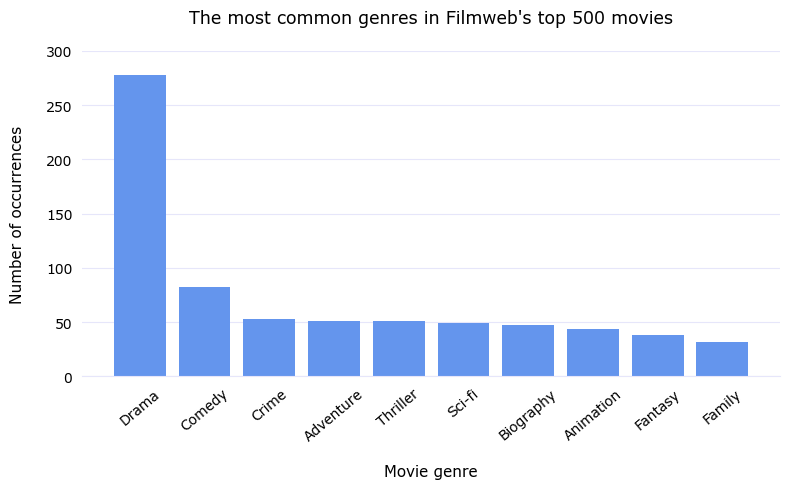

In [12]:
# plt.style.use('default')

list_of_all_genres = []

for genre in df['genre']:
    list_of_all_genres += genre

counted_genres = Counter(list_of_all_genres)

most_common_genres = dict(sorted(counted_genres.items(), key = lambda i: i[1], reverse = True)[:10])

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.family'] = 'MS Reference Sans Serif'

fig, ax = plt.subplots()

ax.bar(most_common_genres.keys(), most_common_genres.values(), color='cornflowerblue')

ax.set_ylim([0, 300])

ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.bottom.set_color('lavender')

ax.tick_params(bottom=False, left=False)
ax.tick_params(axis='x', labelrotation=40)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='lavender')

ax.set_xlabel('Movie genre', labelpad=15, fontsize=11)
ax.set_ylabel('Number of occurrences', labelpad=15, fontsize=11)
ax.set_title('The most common genres in Filmweb\'s top 500 movies', pad=20, weight='bold', fontsize=12.5)

fig.tight_layout()

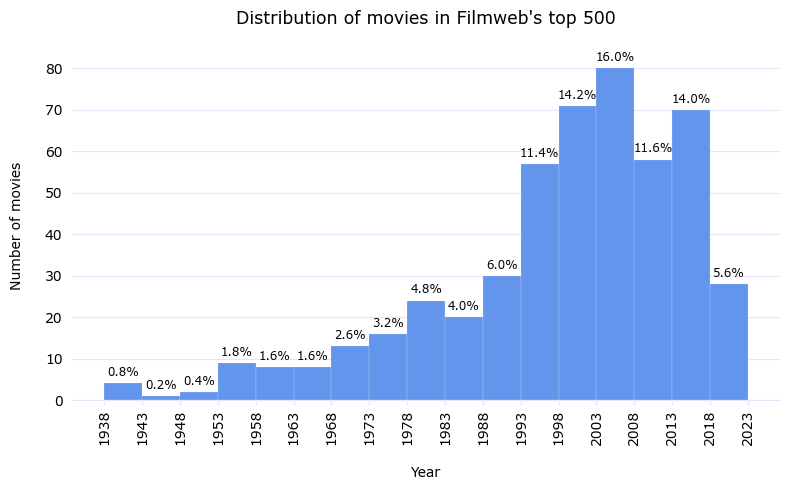

In [13]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.family'] = 'MS Reference Sans Serif'

fig, ax = plt.subplots()

bins = np.arange(1938, 2024, 5)
counts, bins, patches = ax.hist(df['release year'], bins=bins, 
               color='cornflowerblue', edgecolor='lavender', linewidth=0.15)

ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.bottom.set_color('lavender')

ax.tick_params(left=False, color='lavender')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xticks(bins)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='lavender')

# check if it stays or not
for count, patch in zip(counts, patches):
    percent = '%0.1f%%' % (100 * float(count) / counts.sum())
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height+1, percent, ha='center', va='bottom', fontsize=8.5)
    

ax.set_xlabel('Year', labelpad=15, fontsize=10)
ax.set_ylabel('Number of movies', labelpad=15, fontsize=10)
ax.set_title('Distribution of movies in Filmweb\'s top 500', pad=20, weight='bold', fontsize=12.5)

fig.tight_layout()

In [3]:
df_grouped_by_year = df.groupby("release year").agg({"duration (mi)" : np.mean})
df_grouped_by_year['7_years_rolling_avg'] = df_grouped_by_year['duration (mi)'].rolling(7).mean()
df_grouped_by_year.head(10).style.format({'budget (USD)': '{:,.0f}'})

,duration (mi),7_years_rolling_avg
release year,,
1927,153.000000,nan
1939,226.000000,nan
1940,124.000000,nan
1941,119.000000,nan
1942,102.000000,nan
1946,130.000000,nan
1950,110.000000,137.714286
1952,103.000000,130.571429
1953,118.000000,115.142857


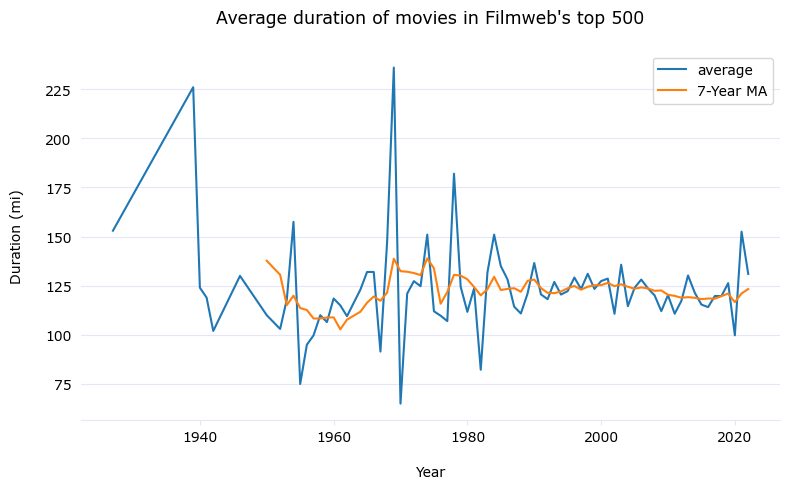

In [14]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.family'] = 'MS Reference Sans Serif'

fig, ax = plt.subplots()

df_grouped_by_year['duration (mi)'].plot(ax=ax, label='average')
df_grouped_by_year['7_years_rolling_avg'].plot(ax=ax, label='7-Year MA')

ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.bottom.set_color('lavender')

ax.tick_params(left=False, color='lavender')

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='lavender')    

ax.set_xlabel('Year', labelpad=15, fontsize=10)
ax.set_ylabel('Duration (mi)', labelpad=15, fontsize=10)
ax.set_title('Average duration of movies in Filmweb\'s top 500', pad=20, weight='bold', fontsize=12.5)

ax.legend()

fig.tight_layout()

#### Conclusions: 
#### There is no correlation between duration and release year of the movies in TOP 500 filmweb's movies.
#### People prefer to watch movies that are more or less 2 hours long.

In [5]:
df_exploded = df.explode('country')
common_countries_dict = df_exploded.groupby("country").size().sort_values(ascending=False).head(6).to_dict()

common_countries_dict

{'USA': 364,
 'Great Britain': 101,
 'Germany': 56,
 'France': 56,
 'Poland': 52,
 'Italy': 20}

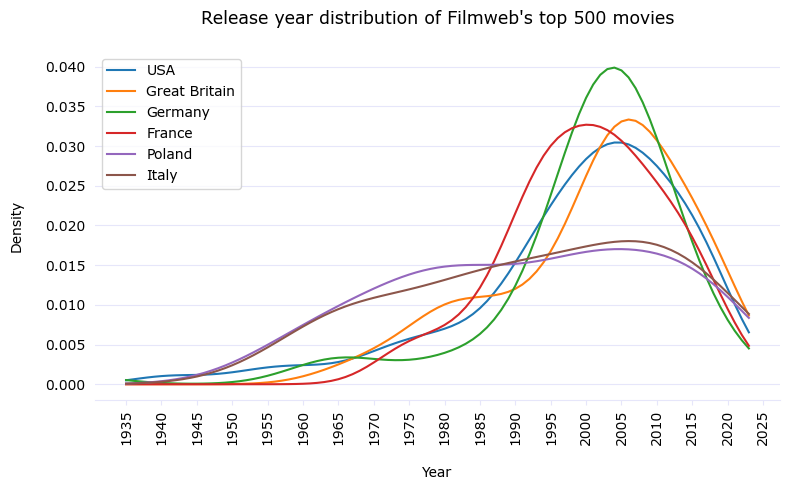

In [15]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.family'] = 'MS Reference Sans Serif'

fig, ax = plt.subplots()

density = stats.gaussian_kde(df['release year'])

bins = np.arange(1935, 2026, 5)

for country in common_countries_dict.keys():
    subset = df_exploded[df_exploded['country'] == country]
    density = stats.gaussian_kde(subset['release year'])
    plt.plot(np.arange(1935, 2024, 1), density(np.arange(1935, 2024, 1)), label=country)
    
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.right.set_visible(False)
ax.spines.bottom.set_color('lavender')

ax.tick_params(left=False, color='lavender')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xticks(bins)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='lavender')
    
ax.set_xlabel('Year', labelpad=15, fontsize=10)
ax.set_ylabel('Density', labelpad=15, fontsize=10)
ax.set_title('Release year distribution of Filmweb\'s top 500 movies', pad=20, weight='bold', fontsize=12.5)

plt.legend()

fig.tight_layout()